In [45]:
# Importació de les llibreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
# Lectura de les dades de renda mitjana per cada barri de Barcelona (només fins el 2018)

df2 = pd.read_excel('renta_neta_media.xlsx')

df2.columns = ['Districte', 'Barri', 'SC', '2015','2016','2017','2018','U1','U2']
barcelona = df2.head(1)
df2 = df2.drop(['U1'],axis=1)
df2 = df2.drop(['U2'],axis=1)
df2 = df2.dropna()

df2['Barri'] = df2['Barri'].astype(int)
df3 = df2.drop(['SC'], axis=1)

anys = ['2015','2016','2017','2018']


df4=df3.groupby('Barri', as_index=False)[anys].mean()
df_renda = df4

In [47]:
# Lectura de les dades de preu del lloguer mitjà per cada barri de Barcelona

df5 = pd.read_excel('preu_vivenda.xlsx')
df5.columns = ['Barri', '2015','2016','2017','2018']
barcelona2 = df5.head(1)
df5 = df5.drop([0])
df_lloguer = df5

In [48]:
# Llista dels noms dels barris de Barcelona

llista_barris = list(df5['Barri'])
x = [2015,2016,2017,2018]

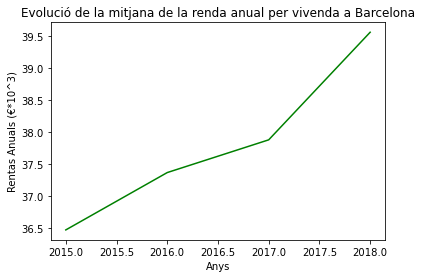

In [49]:
# Plot de la gràfica de la tendència general de la renda mitjana per cada barri de Barcelona

mitjana_income=list(barcelona.loc[0])[3:7]
mitjana_rent=list(barcelona2.loc[0])[1:5]
x = [2015,2016,2017,2018]

fig, ax = plt.subplots()
plt.plot(x,mitjana_income,color="green")
#ax.set_title()
ax.set_xlabel('Anys')
ax.set_title("Evolució de la mitjana de la renda anual per vivenda a Barcelona")
ax.set_ylabel("Rentas Anuals (€*10^3)")

plt.show()

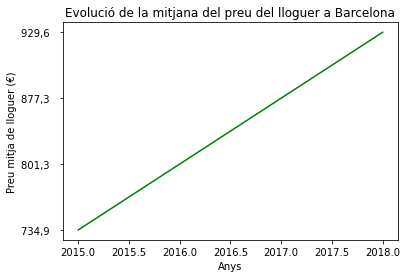

In [50]:
# Plot de la gràfica de les dades de preu del lloguer mitjà per cada barri de Barcelona

fig, ax = plt.subplots()
plt.plot(x,mitjana_rent, color="green")
ax.set_title("Evolució de la mitjana del preu del lloguer a Barcelona")
ax.set_xlabel('Anys')
ax.set_ylabel("Preu mitja de lloguer (€)")

plt.show()

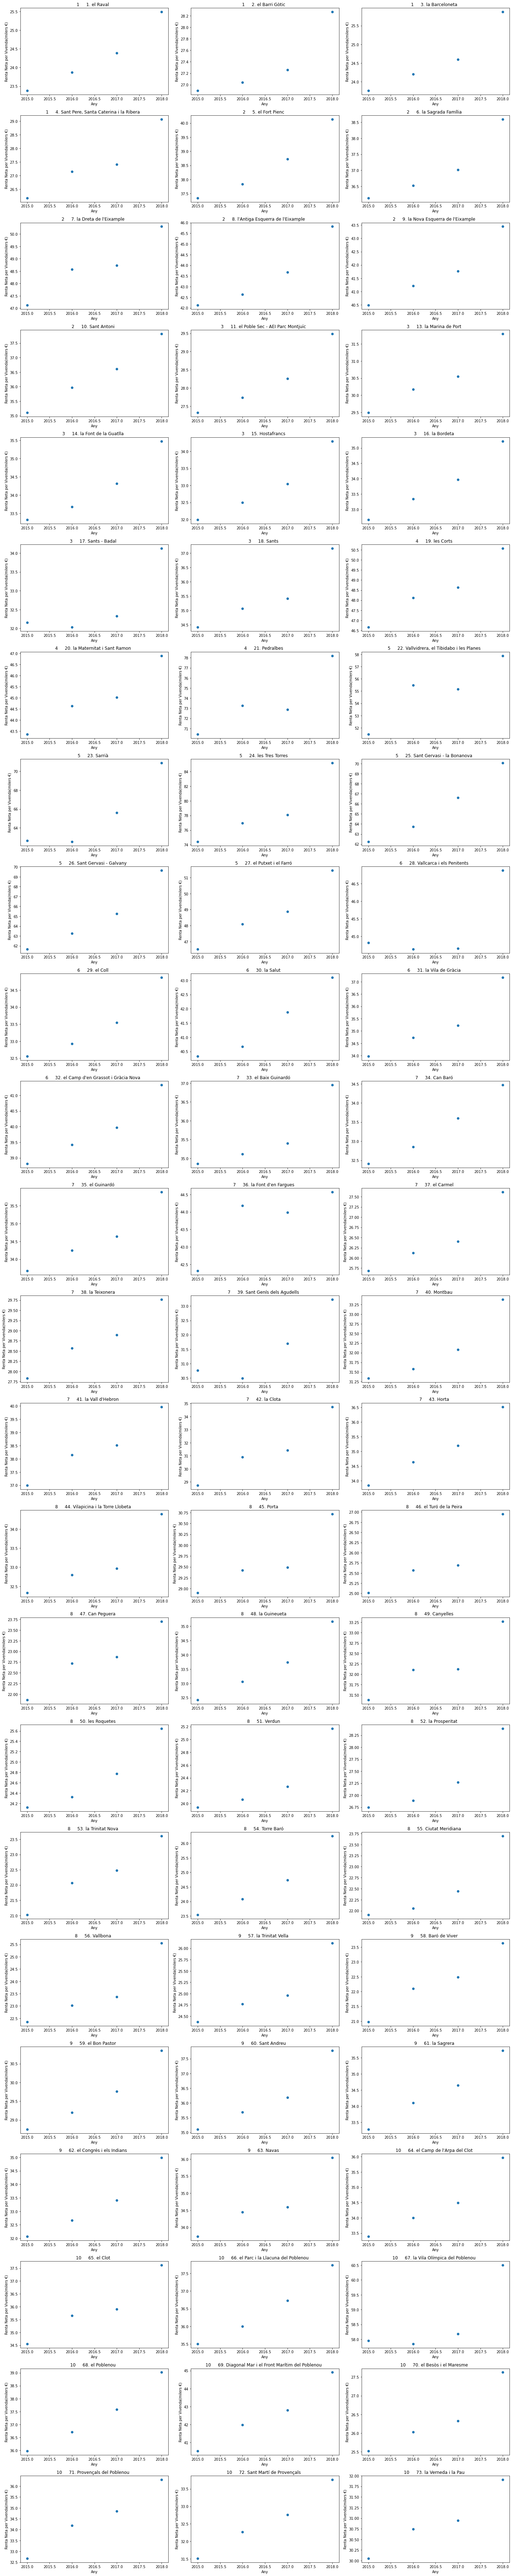

In [51]:
# Scatter plot de la renda mitjana per cada barri de Barcelona

fig, matrix = plt.subplots(24,3, figsize=(20,100))

for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y = list(df4.loc[i*3 + j])[1:]
            matrix[i][j].scatter(x,y)
            matrix[i][j].set_title(llista_barris[i*3 + j])
            matrix[i][j].set_xlabel('Any')
            matrix[i][j].set_ylabel('Renta Neta per Vivenda(milers €)')

plt.tight_layout()

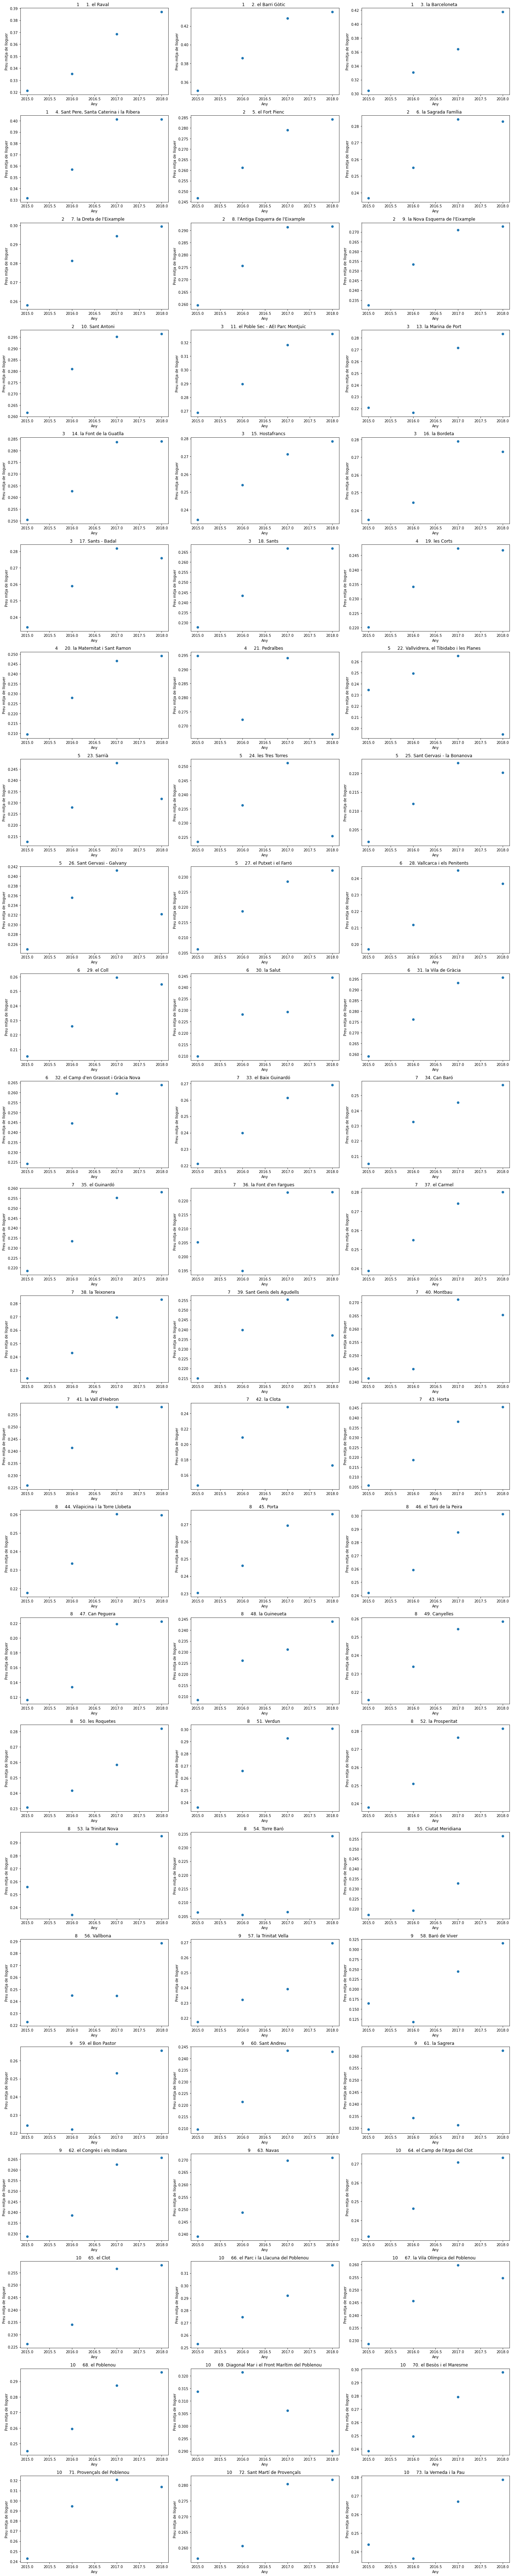

In [52]:
# Scatter plot de preu del lloguer mitjà per cada barri de Barcelona (només fins el 2018)

fig, matrix = plt.subplots(24,3, figsize=(20,100))

for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y_=[]
            ratios = []
            y = list(df5.loc[i*3 + j + 1])[1:] 
            rentas = list(df4.loc[i*3 + j])[1:] 
            for k in range(4):
                a = y[k].replace('.', '')
                a = a.replace(',', '.')
                y_.append(a)
            y_ = [float(y_[i])*12 for i in range(4)]
            rentas = [float(rentas[i])*1000 for i in range(4)]
            ratios += [y_[j]/rentas[j] for j in range(4)]
            matrix[i][j].scatter(x,ratios)
            matrix[i][j].set_title(llista_barris[i*3 + j])
            matrix[i][j].set_xlabel('Any')
            matrix[i][j].set_ylabel('Preu mitja de lloguer')

plt.tight_layout()

In [53]:
# Càlcul dels coeficients de correlació al quadrat de les dades de renda per barri de Barcelona
# (Amb aquests valors acabem de justificar que hi ha correlació lineal)

correlation_renting=[]
x = [2015,2016,2017,2018]
for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y_=[]
            ratios = []
            y = list(df5.loc[i*3 + j + 1])[1:] 
            rentas = list(df4.loc[i*3 + j])[1:] 
            for k in range(4):
                a = y[k].replace('.', '')
                a = a.replace(',', '.')
                y_.append(a)
            y_ = [float(y_[i])*12 for i in range(4)]
            rentas = [float(rentas[i])*1000 for i in range(4)]
            ratios += [y_[j]/rentas[j] for j in range(4)]
            reg = LinearRegression().fit(np.array(x).reshape(-1,1),y_)

            correlation_renting.append(reg.score(np.array(x).reshape(-1,1),y_))

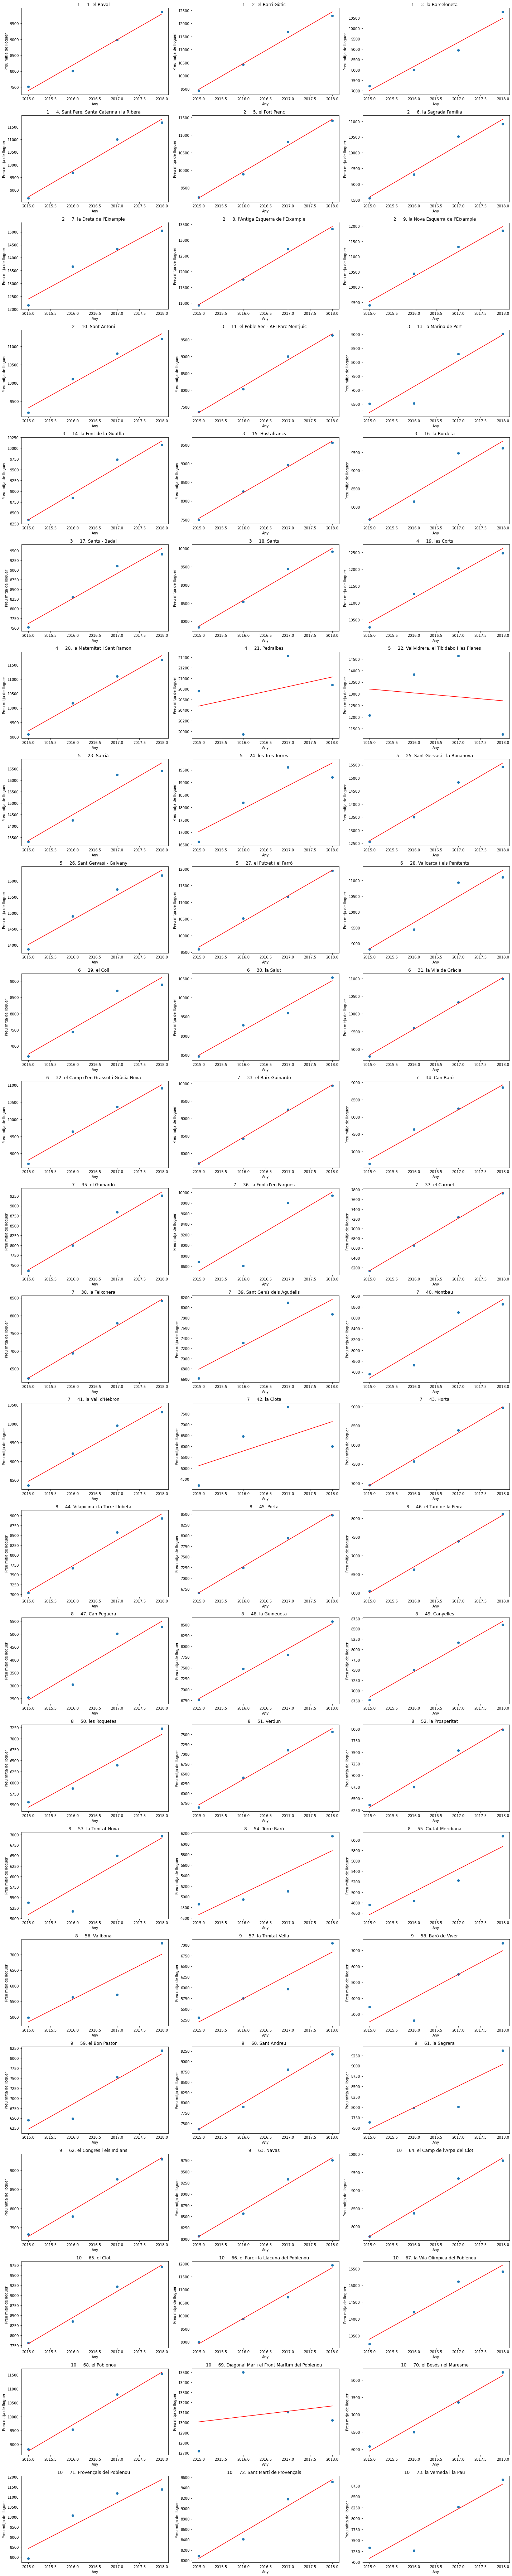

In [54]:
# Càlcul i plot de les rectes de regressió lineal del preu del lloguer mitjà per cada barri de Barcelona (només fins el 2018)

fig, matrix = plt.subplots(24,3, figsize=(20,100))
correlation_renting=[]
x = [2015,2016,2017,2018]
for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y_=[]
            ratios = []
            y = list(df5.loc[i*3 + j + 1])[1:] 
            rentas = list(df4.loc[i*3 + j])[1:] 
            for k in range(4):
                a = y[k].replace('.', '')
                a = a.replace(',', '.')
                y_.append(a)
            y_ = [float(y_[i])*12 for i in range(4)]
            rentas = [float(rentas[i])*1000 for i in range(4)]
            ratios += [y_[j]/rentas[j] for j in range(4)]
            reg = LinearRegression().fit(np.array(x).reshape(-1,1),y_)

            correlation_renting.append(reg.score(np.array(x).reshape(-1,1),y_))
            pred = reg.predict(np.array(x).reshape(-1,1))
            matrix[i][j].scatter(x,y_)
            matrix[i][j].plot(x, pred, color='red')
            matrix[i][j].set_title(llista_barris[i*3 + j])
            matrix[i][j].set_xlabel('Any')
            matrix[i][j].set_ylabel('Preu mitja de lloguer')

plt.tight_layout()

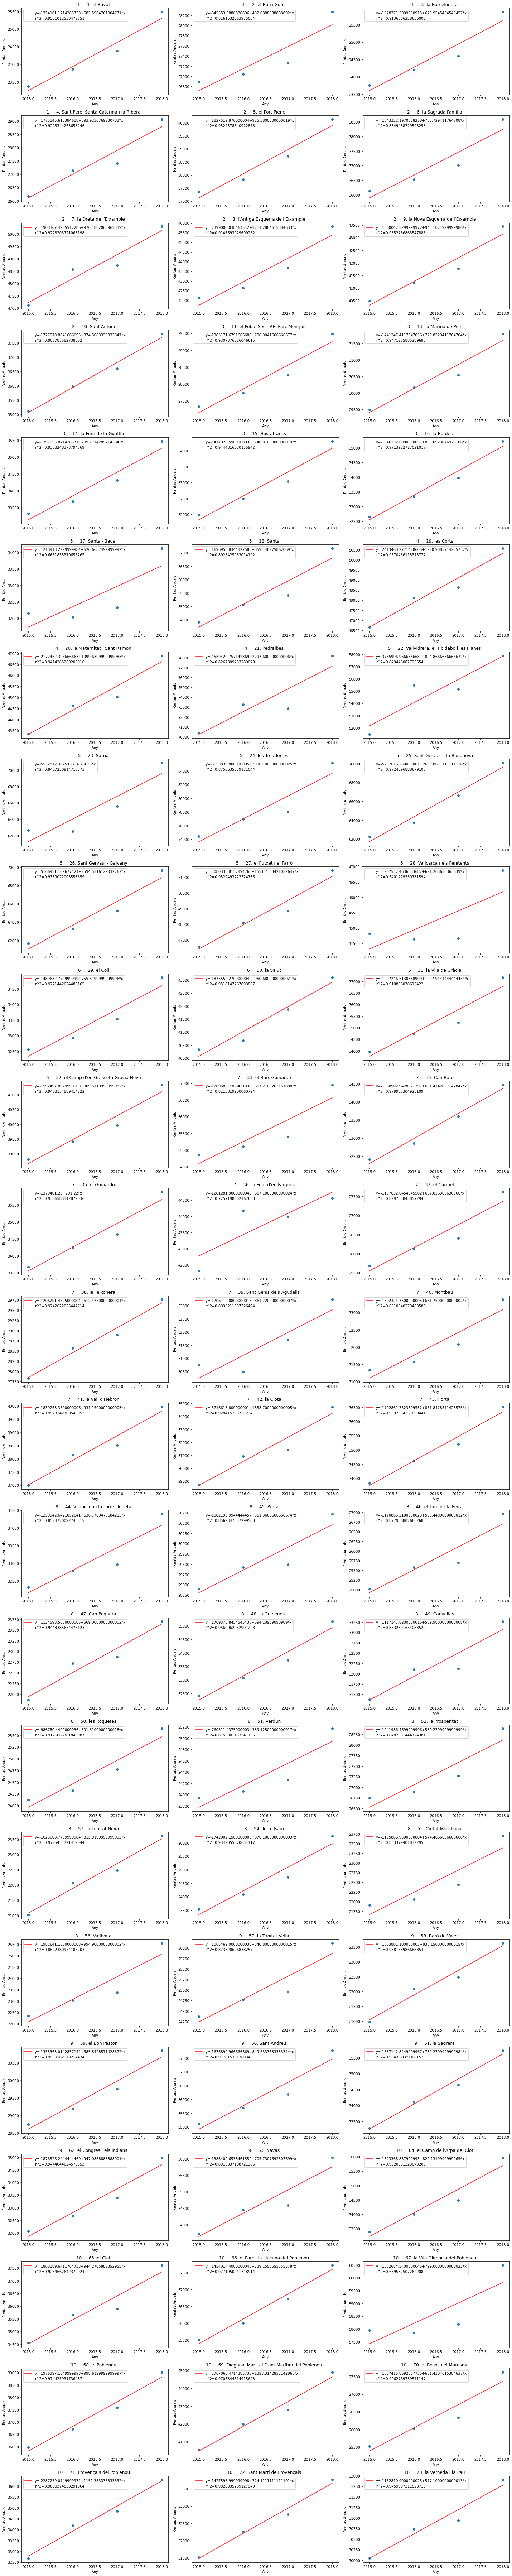

In [55]:
# Càlcul i plot de les rectes de regressió lineal de les dades de renda per barri de Barcelona

fig, matrix = plt.subplots(24,3, figsize=(20,100))
correlation_income=[]
coeffs_income = []
x = [2015,2016,2017,2018]
for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y_=[]
            ratios = []
            y = list(df5.loc[i*3 + j + 1])[1:] 
            rentas = list(df4.loc[i*3 + j])[1:] 
            for k in range(4):
                a = y[k].replace('.', '')
                a = a.replace(',', '.')
                y_.append(a)
            y_ = [float(y_[i])*12 for i in range(4)]
            rentas = [float(rentas[i])*1000 for i in range(4)]
            ratios += [y_[j]/rentas[j] for j in range(4)]
            reg = LinearRegression().fit(np.array(x).reshape(-1,1),rentas)

            correlation_income.append(reg.score(np.array(x).reshape(-1,1),rentas))
            pred = reg.predict(np.array(x).reshape(-1,1))
            matrix[i][j].scatter(x,rentas)
            matrix[i][j].plot(x, pred, color='red')
            matrix[i][j].set_title(llista_barris[i*3 + j])
            matrix[i][j].set_xlabel('Any')
            matrix[i][j].set_ylabel('Rentas Anuals')
            matrix[i][j].legend(("y="+str(reg.intercept_)+"+"+str(reg.coef_[0])+"*x", "r^2="+str(correlation_income[i*3+j])), markerscale=0)
            coeffs_income.append([reg.intercept_, reg.coef_[0]])

plt.tight_layout()

In [56]:
# Lectura de les dades de renda mitjana per cada barri de Barcelona (fins el 2020)

df6 = pd.read_excel('preu_vivenda_fins2020.xlsx')
df6.columns = ['Barri', '2015','2016','2017','2018', '2019', '2020']
barcelona2 = df6.head(1)
df6 = df6.drop([0])
df_lloguer_fins_2020 = df6

In [57]:
# Funció auxiliar per arrodonir valors de manera més ràpida i eficient

def r(x, n=2):
    return round(x, n)

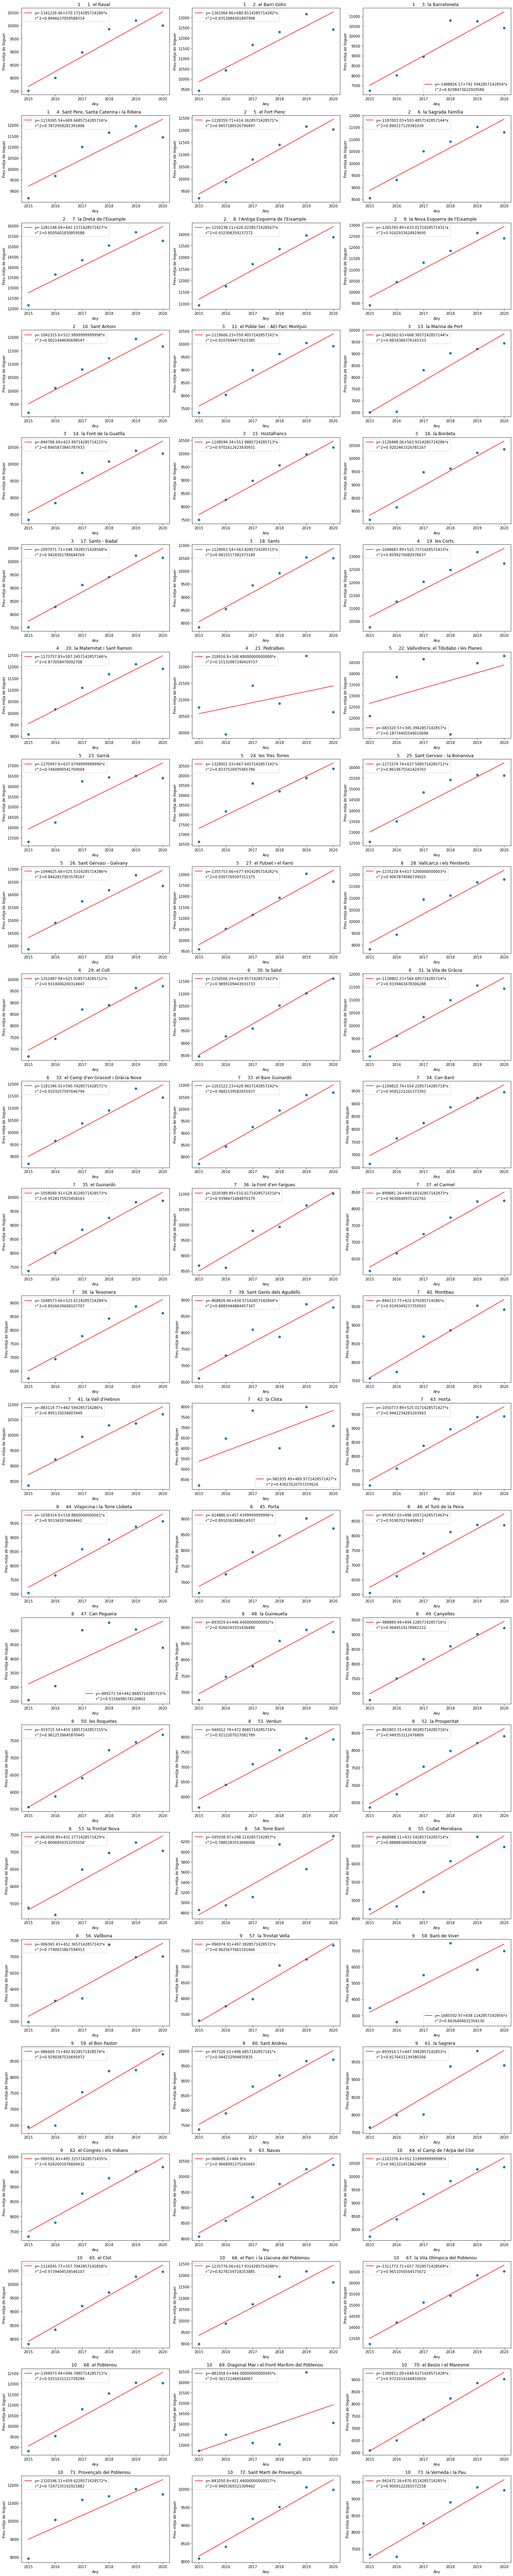

In [58]:
# Càlcul i plot de les rectes de regressió lineal del preu del lloguer mitjà per cada barri de Barcelona (fins el 2020)

fig, matrix = plt.subplots(24,3, figsize=(20,100))
correlation_renting=[]
coeffs_renting = []
x = [2015,2016,2017,2018,2019,2020]
for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y_=[]
            y = list(df6.loc[i*3 + j + 1])[1:] 
            for k in range(6):
                a = y[k].replace('.', '')
                a = a.replace(',', '.')
                y_.append(a)
            y_ = [float(y_[i])*12 for i in range(6)]
            reg = LinearRegression().fit(np.array(x).reshape(-1,1),y_)

            correlation_renting.append(reg.score(np.array(x).reshape(-1,1),y_))
            pred = reg.predict(np.array(x).reshape(-1,1))
            matrix[i][j].scatter(x,y_)
            matrix[i][j].plot(x, pred, color='red')
            matrix[i][j].set_title(llista_barris[i*3 + j])
            matrix[i][j].set_xlabel('Any')
            matrix[i][j].set_ylabel('Preu mitja de lloguer')
            matrix[i][j].legend(("y="+str(r(reg.intercept_))+"+"+str(reg.coef_[0])+"*x", "r^2="+str(correlation_renting[i*3+j])), markerscale=0)
            coeffs_renting.append([reg.intercept_, reg.coef_[0]])

plt.tight_layout()

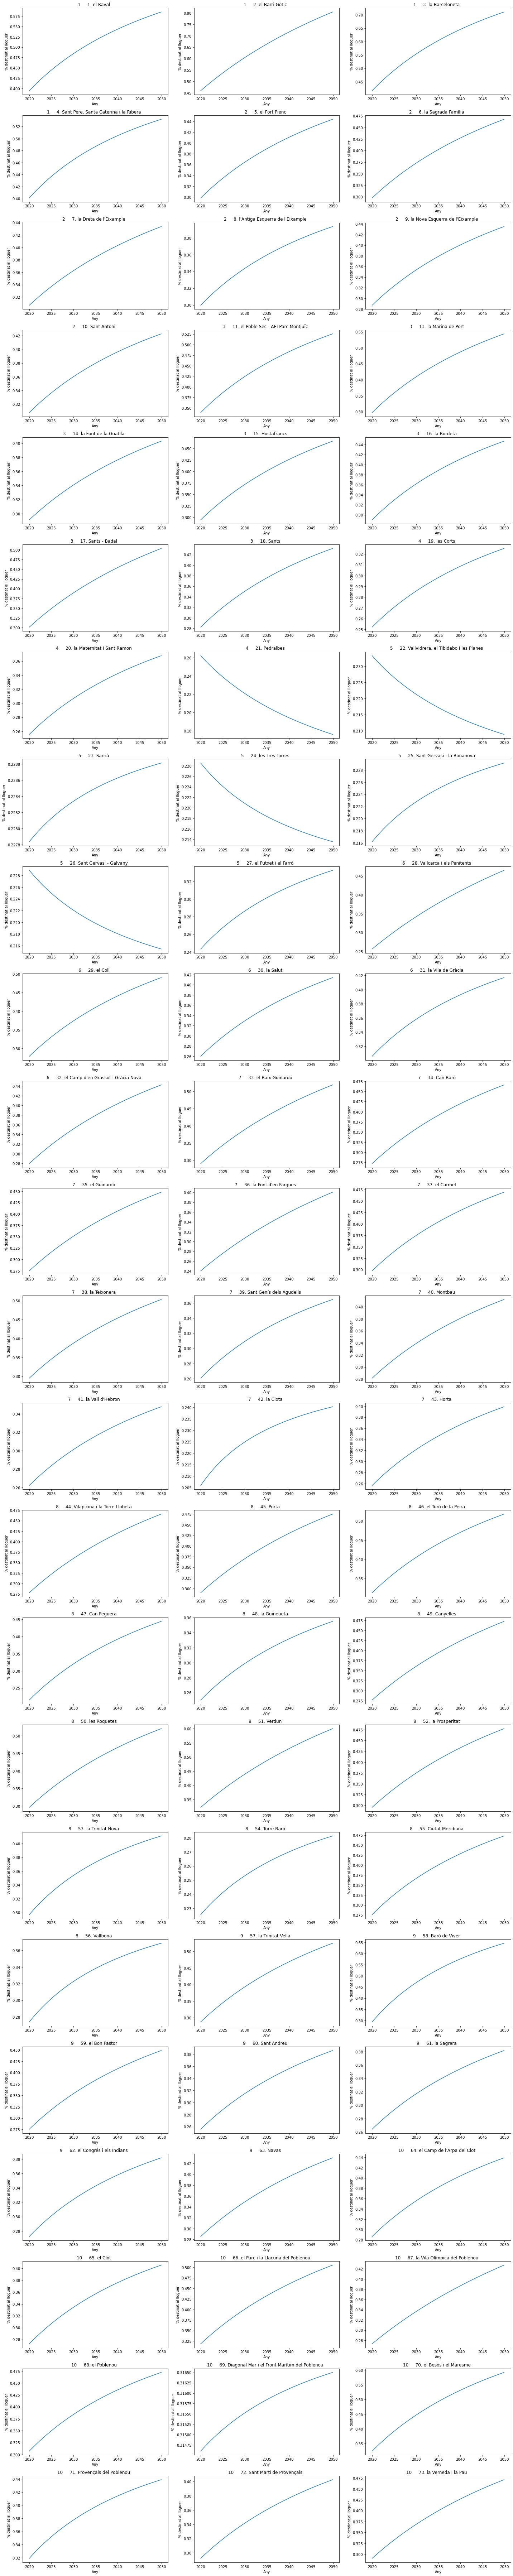

In [59]:
# Càlcul i plot de les gràfiques de predicció del percentatge mitjà de la renda destinada a pagar el preu del lloguer
# a cada Barri de Barcelona

fig, matrix = plt.subplots(24,3, figsize=(20,100))

x = list(np.arange(2020, 2050, 0.1))
for i in range(24):
    for j in range(3):
        if (i*3+j <= 71):
            y_ = [(coeffs_renting[i*3+j][0]+coeffs_renting[i*3+j][1]*xi)/(coeffs_income[i*3+j][0]+coeffs_income[i*3+j][1]*xi) for xi in x]
            matrix[i][j].plot(x,y_)
            matrix[i][j].set_title(llista_barris[i*3 + j])
            matrix[i][j].set_xlabel('Any')
            matrix[i][j].set_ylabel('% destinat al lloguer')
plt.tight_layout()

In [60]:
# Càlcul d'aquests percentatges pels anys 2020 i 2035

ratios_2020 = []
ratios_2035 = []
x = list(np.arange(2020, 2050, 0.1))
for i in range(72):
    xi = 2020
    xj = 2035
    ratios_2020.append((coeffs_renting[i][0]+coeffs_renting[i][1]*xi)/(coeffs_income[i][0]+coeffs_income[i][1]*xi))
    ratios_2035.append((coeffs_renting[i][0]+coeffs_renting[i][1]*xj)/(coeffs_income[i][0]+coeffs_income[i][1]*xj))

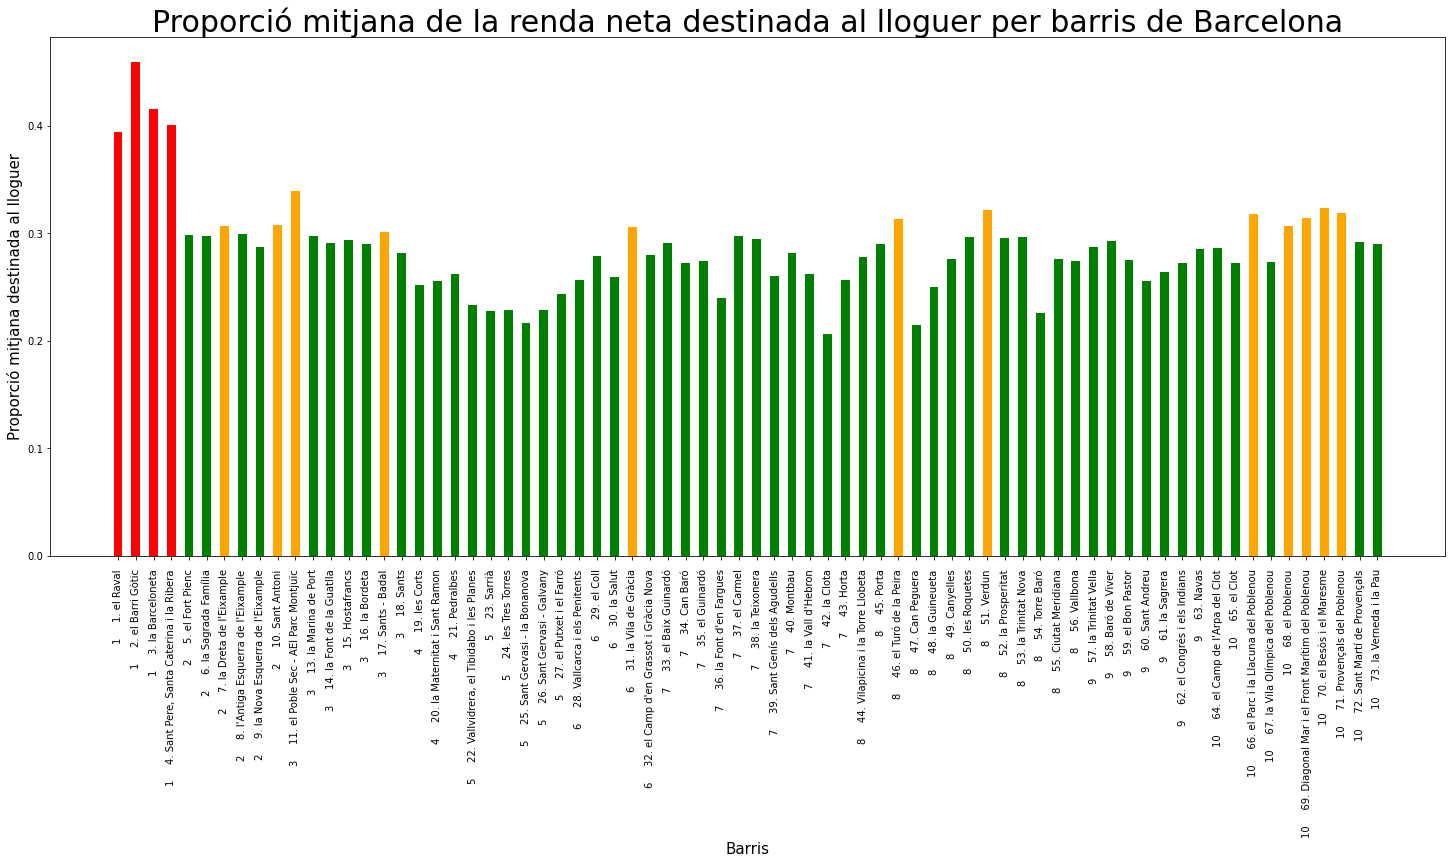

In [61]:
# Plot amb colors de la proporció mitjana de la renda neta destinada a pagar el preu del lloguer per barris de Barcelona al 2020
# En color vermell, els barris on la proporció és major al 35% --> situació crítica
# En color taronja, els barris on la proporció és d'entre el 30% i el 35% --> situació relativament greu
# En color verd, els barris on la proporció és menor al 30% --> situació no preocupant

fig,ax = plt.subplots(figsize=(25,40))
colors = []
green=0
red=0
orange=0
count=0
for x in ratios_2020:
    count+=1
    if x < 0.3:
        colors.append('green')
        green+=1

    elif x >= 0.35:
        colors.append('red')
        red+=1
    else:
        colors.append('orange')
        orange+=1

indexs_barris = np.arange(0, 72)
plt.bar(indexs_barris, ratios_2020, color=colors, width=0.5)
plt.xticks(indexs_barris, llista_barris, rotation='vertical')
ax.set_title("Proporció mitjana de la renda neta destinada al lloguer per barris de Barcelona",fontsize=30)
ax.set_xlabel('Barris',fontsize=15)
ax.set_ylabel("Proporció mitjana destinada al lloguer",fontsize=15)
spacing = 0.7
fig.subplots_adjust(bottom=spacing)

plt.show()

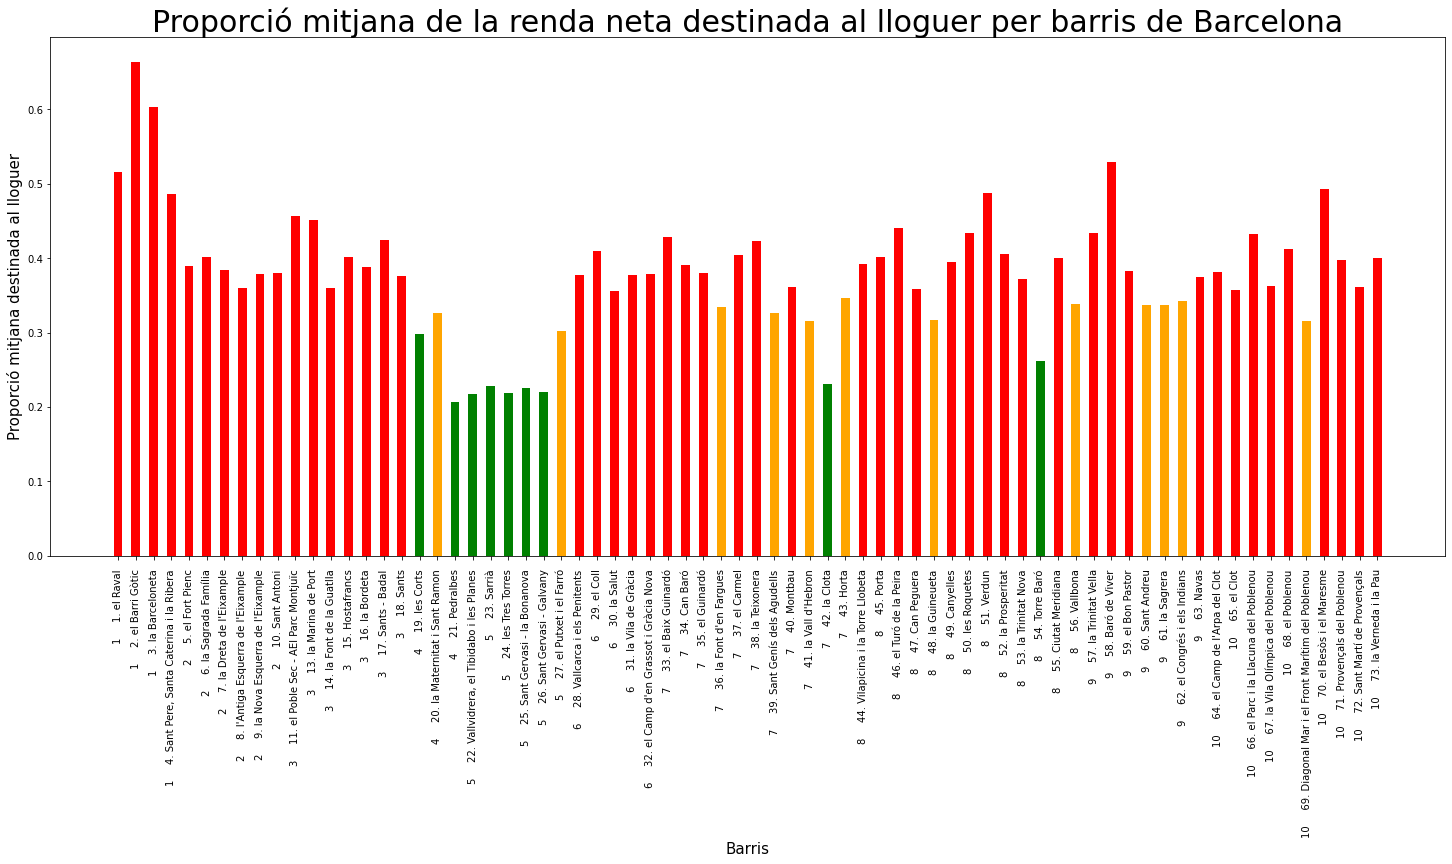

In [62]:
# Plot amb colors de la proporció mitjana de la renda neta destinada a pagar el preu del lloguer per barris de Barcelona al 2035
# En color vermell, els barris on la proporció és major al 35% --> situació crítica
# En color taronja, els barris on la proporció és d'entre el 30% i el 35% --> situació relativament greu
# En color verd, els barris on la proporció és menor al 30% --> situació no preocupant

fig,ax = plt.subplots(figsize=(25,40))
colors = []
green=0
red=0
orange=0
for x in ratios_2035:
    if x < 0.3:
        colors.append('green')
        green+=1
    elif x >= 0.35:
        colors.append('red')
        red+=1
    else:
        colors.append('orange')
        orange+=1

indexs_barris = np.arange(0, 72)
plt.bar(indexs_barris, ratios_2035, color=colors, width=0.5)
plt.xticks(indexs_barris, llista_barris, rotation='vertical')
ax.set_title("Proporció mitjana de la renda neta destinada al lloguer per barris de Barcelona",fontsize=30)
ax.set_xlabel('Barris',fontsize=15)
ax.set_ylabel("Proporció mitjana destinada al lloguer",fontsize=15)
spacing = 0.7
fig.subplots_adjust(bottom=spacing)

plt.show()